In [651]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [652]:
# convert csv to dataframe
df=pd.read_csv("E:/UDHAYA/Cardeko_project/Cleaned_csv/All_cars_data.csv")
df

,it,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats_1,Color,Gear Box,Drive Type,City
0,0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,₹ 4 Lakh,Third Party insurance,"1,20,000 Kms",23.1 kmpl,998 CC,5.0,White,5 Speed,FWD,Bangalore
1,0,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,₹ 8.11 Lakh,Comprehensive,"32,706 Kms",17 kmpl,1497 CC,5.0,White,5 Speed,FWD,Bangalore
2,0,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,₹ 5.85 Lakh,Comprehensive,"11,949 Kms",23.84 kmpl,1199 CC,5.0,Red,5 Speed,FWD,Bangalore
3,0,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,₹ 4.62 Lakh,Comprehensive,"17,794 Kms",19.1 kmpl,1197 CC,5.0,Others,5 Speed,FWD,Bangalore
4,0,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,₹ 7.90 Lakh,Third Party insurance,"60,000 Kms",23.65 kmpl,1248 CC,5.0,Gray,5 Speed,FWD,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,0,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,₹ 5.10 Lakh,Third Party insurance,"10,000 Kms",25.24 kmpl,998 CC,5.0,Others,5-Speed,NaN,Kolkata
8365,0,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,₹ 1.80 Lakh,Third Party insurance,"1,20,000 Kms",22.74 kmpl,796 CC,5.0,Others,5 Speed,FWD,Kolkata
8366,0,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,₹ 5.50 Lakh,Third Party insurance,"50,000 Kms",11.74 kmpl,1796 CC,5.0,Others,7 Speed,RWD,Kolkata
8367,0,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,₹ 1.40 Lakh,Third Party insurance,"40,000 Kms",18.5 kmpl,1197 CC,5.0,Others,5 Speed,FWD,Kolkata


In [653]:
# count of missing values
df.isnull().sum()

it                       0
ft                       0
bt                       4
transmission             0
ownerNo                  0
oem                      0
model                    0
modelYear                0
price                    0
Insurance Validity       4
Kms Driven               2
Mileage                287
Engine                   4
Seats_1                  6
Color                    3
Gear Box              2680
Drive Type            3714
City                     0
dtype: int64

# Data Cleaning & Preprocessing

In [655]:
# drop columns from the dataframe
df.drop(columns=["it","Gear Box","Drive Type"],inplace=True,axis=1)

In [656]:
# body type unique values
df["bt"].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans',
       'Pickup Trucks', 'Convertibles', 'Hybrids', nan, 'Wagon'],
      dtype=object)

In [657]:
# retrive nan values from body type
df[pd.isna(df["bt"])]

,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats_1,Color,City
3382,Petrol,NaN,Automatic,1,Toyota,Toyota Vellfire,2023,₹ 1.19 Crore,Comprehensive,"10,500 Kms",NaN,2487 CC,7.0,White,Delhi
5390,Petrol,NaN,Manual,1,Maruti,Maruti Eeco,2019,₹ 4.95 Lakh,Comprehensive,"13,500 Kms",19.71 kmpl,1197 CC,5.0,Silver,Hyderabad
5411,Petrol,NaN,Manual,1,Maruti,Maruti Eeco,2020,₹ 5.20 Lakh,Comprehensive,"16,415 Kms",19.71 kmpl,1197 CC,5.0,Grey,Hyderabad
8114,Petrol,NaN,Manual,1,Maruti,Maruti Eeco,2019,₹ 3.95 Lakh,Comprehensive,"21,166 Kms",19.71 kmpl,1197 CC,5.0,Blue,Kolkata


In [658]:
# Replace NaN values in 'bt' column with 'Minivans' for specific models
df.loc[df['model'].isin(['Toyota Vellfire', 'Maruti Eeco']), 'bt'] = 'Minivans'

In [659]:
# drop nan values
df.dropna(subset=["Insurance Validity", "Kms Driven", "Engine", "Color"], inplace=True)

In [660]:
# retrive seats nan values
df[pd.isna(df["Seats_1"])]

,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats_1,Color,City
1175,Petrol,Hatchback,Manual,3,Maruti,Maruti Estilo,2009,₹ 2 Lakh,Third Party insurance,"40,000 Kms",19.5 kmpl,1061 CC,NaN,Others,Bangalore
3528,Petrol,SUV,Manual,2,Nissan,Nissan Kicks,2019,₹ 7 Lakh,Third Party insurance,"60,000 Kms",NaN,1498 CC,NaN,Gray,Delhi
6211,Diesel,SUV,Manual,2,Ford,Ford Endeavour,2008,₹ 3.90 Lakh,Third Party insurance,"1,20,000 Kms",11.4 kmpl,2953 CC,NaN,Black,Jaipur
7608,Petrol,Hatchback,Manual,2,Maruti,Maruti Estilo,2010,₹ 1.20 Lakh,Third Party insurance,"70,000 Kms",19.5 kmpl,1061 CC,NaN,Others,Kolkata
7669,Petrol,Hatchback,Manual,2,Maruti,Maruti Estilo,2009,₹ 1.20 Lakh,Third Party insurance,"50,000 Kms",19.5 kmpl,1061 CC,NaN,Gold,Kolkata
7745,Diesel,Sedan,Manual,1,Hindustan Motors,Ambassador,2014,₹ 1.20 Lakh,Third Party insurance,"1,20,000 Kms",12.8 kmpl,1995 CC,NaN,Yellow,Kolkata


In [661]:
# Define seat mappings for specific models
seat_mappings = {
    'Maruti Estilo': 5,
    'Nissan Kicks': 5,
    'Ambassador': 5,
    'Ford Endeavour': 7
}
# Map seat counts based on model and fill NaN values in 'Seats_1'
df['Seats_1'] = df['model'].map(seat_mappings).fillna(df['Seats_1'])

In [662]:
# retrive seats nan values
df[pd.isna(df["Mileage"])]

,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats_1,Color,City
16,Diesel,SUV,Automatic,1,Mercedes-Benz,Mercedes-Benz GLA,2022,₹ 55.95 Lakh,Comprehensive,"16,000 Kms",NaN,1950 CC,5.0,Blue,Bangalore
52,Diesel,Sedan,Automatic,1,Mercedes-Benz,Mercedes-Benz E-Class,2022,₹ 79.90 Lakh,Third Party,400 Kms,NaN,2925 CC,5.0,White,Bangalore
111,Petrol,SUV,Automatic,2,Hyundai,Hyundai Creta,2021,₹ 16.75 Lakh,Comprehensive,"26,500 Kms",NaN,1397 CC,5.0,White,Bangalore
147,Petrol,SUV,Automatic,1,MG,MG Hector,2022,₹ 20.41 Lakh,Comprehensive,"7,500 Kms",NaN,1451 CC,5.0,White,Bangalore
163,Petrol,Sedan,Automatic,1,Mercedes-Benz,Mercedes-Benz A-Class Limousine,2021,₹ 36.90 Lakh,Comprehensive,"11,000 Kms",NaN,1332 CC,5.0,Silver,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8292,Petrol,SUV,Automatic,1,Hyundai,Hyundai Creta,2020,₹ 14.15 Lakh,Third Party insurance,"55,000 Kms",NaN,1497 CC,5.0,White,Kolkata
8296,Petrol,MUV,Manual,1,Kia,Kia Carens,2022,₹ 10.99 Lakh,Comprehensive,"20,000 Kms",NaN,1497 CC,7.0,White,Kolkata
8297,Petrol,MUV,Manual,1,Kia,Kia Carens,2022,₹ 10.99 Lakh,Comprehensive,"20,000 Kms",NaN,1497 CC,7.0,White,Kolkata
8322,Cng,Sedan,Manual,1,Hyundai,Hyundai Xcent Prime,2019,₹ 4.80 Lakh,Third Party insurance,"30,000 Kms",NaN,1197 CC,5.0,Others,Kolkata


In [663]:
# size of the dataframe
df.shape

(8359, 15)

In [664]:
# information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8359 entries, 0 to 8368
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ft                  8359 non-null   object 
 1   bt                  8359 non-null   object 
 2   transmission        8359 non-null   object 
 3   ownerNo             8359 non-null   int64  
 4   oem                 8359 non-null   object 
 5   model               8359 non-null   object 
 6   modelYear           8359 non-null   int64  
 7   price               8359 non-null   object 
 8   Insurance Validity  8359 non-null   object 
 9   Kms Driven          8359 non-null   object 
 10  Mileage             8075 non-null   object 
 11  Engine              8359 non-null   object 
 12  Seats_1             8359 non-null   float64
 13  Color               8359 non-null   object 
 14  City                8359 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.0+ MB


In [665]:
df['Kms Driven'] = df['Kms Driven'].str.replace('Kms', '').str.replace(',', '').str.strip().astype(int)
df['Mileage'] = df['Mileage'].str.replace('kmpl', '').str.replace('km/kg', '').str.strip().astype(float)
df['Engine'] = df['Engine'].str.replace('CC', '').str.strip()
df['Seats_1'] = df['Seats_1'].astype(int)

In [666]:
# Conversion function
def convert_price(price_str):
    # Remove currency symbols and extra spaces
    price_str = price_str.replace('₹', '').replace(',', '').strip()  # Remove currency symbol
    price_str = price_str.replace(' ', '')  # Remove any spaces
    if 'Crore' in price_str:
        value = float(price_str.replace('Crore', '').strip())
        return value * 10000000  # 1 crore = 10,000,000
    elif 'Lakh' in price_str:
        value = float(price_str.replace('Lakh', '').strip())
        return value * 100000  # 1 lakh = 100,000
    else:
        return float(price_str)  # Return as is if it is already a number

# Apply conversion to the 'price' column
df['price'] = df['price'].apply(convert_price)
df

,ft,bt,transmission,ownerNo,oem,model,modelYear,price,Insurance Validity,Kms Driven,Mileage,Engine,Seats_1,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,400000.0,Third Party insurance,120000,23.10,998,5,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,811000.0,Comprehensive,32706,17.00,1497,5,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,585000.0,Comprehensive,11949,23.84,1199,5,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,462000.0,Comprehensive,17794,19.10,1197,5,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,790000.0,Third Party insurance,60000,23.65,1248,5,Gray,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,510000.0,Third Party insurance,10000,25.24,998,5,Others,Kolkata
8365,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,180000.0,Third Party insurance,120000,22.74,796,5,Others,Kolkata
8366,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,550000.0,Third Party insurance,50000,11.74,1796,5,Others,Kolkata
8367,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,140000.0,Third Party insurance,40000,18.50,1197,5,Others,Kolkata


In [667]:
# drop columns from the dataframe
df.drop(columns=["Engine"],inplace=True)
df.reset_index(drop=True, inplace=True)

In [668]:
df['Mileage'] = df['Mileage'].fillna(df['Mileage'].mean())
df.isnull().sum()

ft                    0
bt                    0
transmission          0
ownerNo               0
oem                   0
model                 0
modelYear             0
price                 0
Insurance Validity    0
Kms Driven            0
Mileage               0
Seats_1               0
Color                 0
City                  0
dtype: int64

In [669]:
#Replace columnn names
df=df.rename(columns={"ft":"Fuel type","bt":"body type","Seats_1":"Seats","oem":"Brand","Insurance Validity":"Insurance Type"})
df

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Type,Kms Driven,Mileage,Seats,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,400000.0,Third Party insurance,120000,23.10,5,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,811000.0,Comprehensive,32706,17.00,5,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,585000.0,Comprehensive,11949,23.84,5,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,462000.0,Comprehensive,17794,19.10,5,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,790000.0,Third Party insurance,60000,23.65,5,Gray,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,510000.0,Third Party insurance,10000,25.24,5,Others,Kolkata
8355,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,180000.0,Third Party insurance,120000,22.74,5,Others,Kolkata
8356,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,550000.0,Third Party insurance,50000,11.74,5,Others,Kolkata
8357,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,140000.0,Third Party insurance,40000,18.50,5,Others,Kolkata


In [670]:
# statistical view of the numerical data 
df.describe()

,ownerNo,modelYear,price,Kms Driven,Mileage,Seats
count,8359.000000,8359.000000,8.359000e+03,8.359000e+03,8359.000000,8359.000000
mean,1.359732,2016.511664,9.573922e+05,5.899696e+04,19.245568,5.203254
std,0.641480,3.904774,1.416906e+06,7.408873e+04,3.836193,0.663339
min,0.000000,1985.000000,2.800000e+04,1.010000e+02,7.080000,2.000000
25%,1.000000,2014.000000,3.990000e+05,3.000000e+04,17.010000,5.000000
50%,1.000000,2017.000000,6.010000e+05,5.370100e+04,19.020000,5.000000
75%,2.000000,2019.000000,9.500000e+05,8.000000e+04,21.400000,5.000000
max,5.000000,2023.000000,4.150000e+07,5.500000e+06,140.000000,10.000000


In [671]:
# statistical view of the categorical data
df.describe(include="object")

,Fuel type,body type,transmission,Brand,model,Insurance Type,Color,City
count,8359,8359,8359,8359,8359,8359,8359,8359
unique,5,10,2,33,315,7,152,6
top,Petrol,Hatchback,Manual,Maruti,Honda City,Third Party insurance,Others,Delhi
freq,5547,3563,6046,2248,370,4051,2168,1484


# Data Visualization

In [673]:
df["Fuel type"].unique()

array(['Petrol', 'Diesel', 'Lpg', 'Cng', 'Electric'], dtype=object)

In [674]:
df["Fuel type"].value_counts()

Fuel type
Petrol      5547
Diesel      2671
Cng           98
Electric      27
Lpg           16
Name: count, dtype: int64

<Axes: title={'center': 'Count of Fuel type'}, xlabel='Fuel type', ylabel='count'>

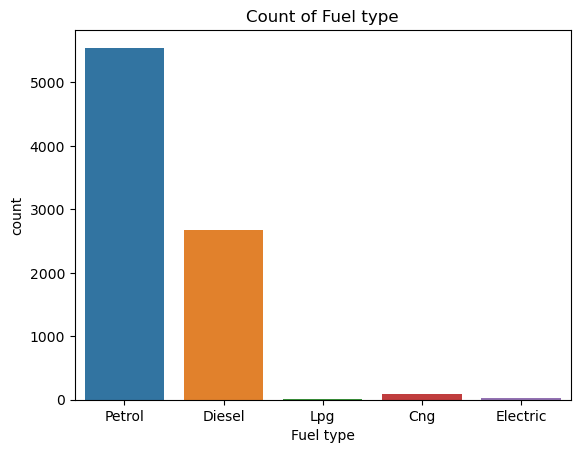

In [675]:
# visual the count of fuel type
plt.title("Count of Fuel type")
sns.countplot(x=df["Fuel type"],data=df,hue="Fuel type")

In [676]:
df["body type"].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans',
       'Pickup Trucks', 'Convertibles', 'Hybrids', 'Wagon'], dtype=object)

In [677]:
df["body type"].value_counts()

body type
Hatchback        3563
SUV              2222
Sedan            2171
MUV               352
Minivans           27
Coupe              10
Pickup Trucks       6
Convertibles        6
Hybrids             1
Wagon               1
Name: count, dtype: int64

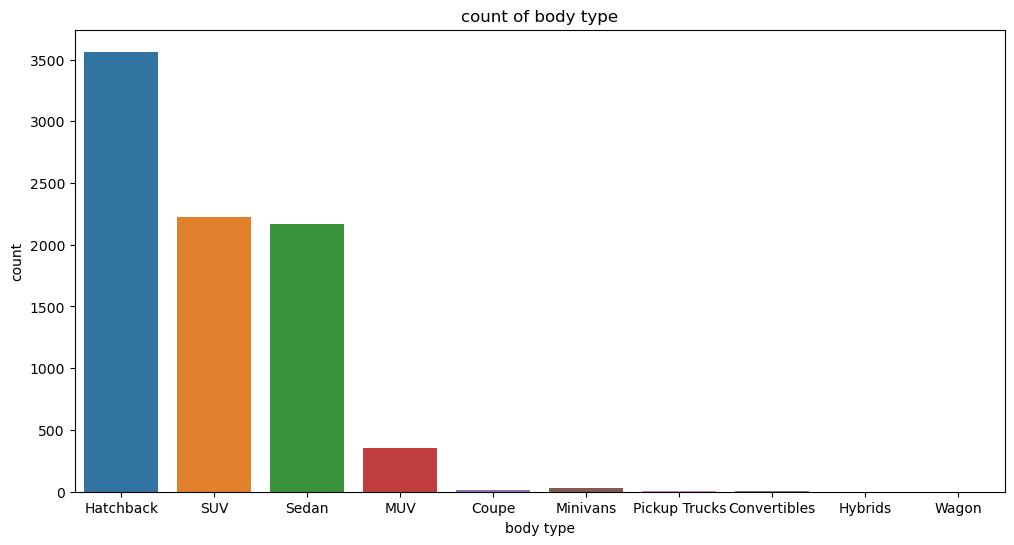

In [678]:
# visual the count of body type
plt.figure(figsize=(12,6))
plt.title("count of body type")
sns.countplot(x=df["body type"],data=df,hue="body type")
plt.show()

In [679]:
df["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [680]:
df["transmission"].value_counts()

transmission
Manual       6046
Automatic    2313
Name: count, dtype: int64

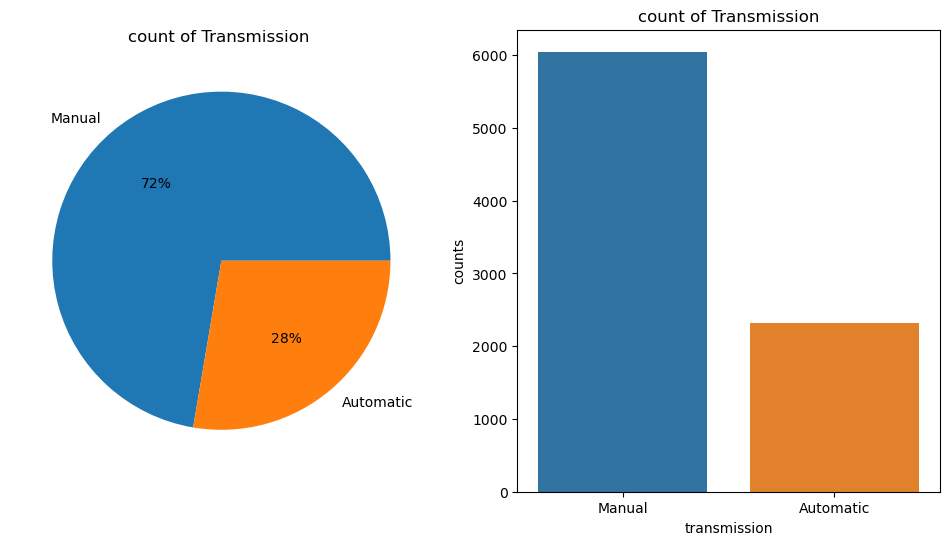

In [681]:
# visual the count of transmission
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("count of Transmission ")
plt.pie(df["transmission"].value_counts(),autopct="%1.0f%%",labels=['Manual','Automatic'])
plt.subplot(1,2,2)
sns.countplot(x=df["transmission"],data=df,hue="transmission")
plt.xlabel("transmission")
plt.ylabel("counts")
plt.title("count of Transmission")
plt.show()

In [682]:
df["Brand"].unique()

array(['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
       'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
       'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan',
       'Fiat', 'Mahindra Ssangyong', 'Mitsubishi', 'Jaguar', 'Land Rover',
       'Chevrolet', 'Citroen', 'Opel', 'Mahindra Renault', 'Isuzu',
       'Lexus', 'Porsche', 'Hindustan Motors'], dtype=object)

In [683]:
df["Brand"].value_counts()

Brand
Maruti                2248
Hyundai               1651
Honda                  864
Tata                   430
Mahindra               376
Toyota                 325
Renault                311
Ford                   311
Volkswagen             294
Mercedes-Benz          244
BMW                    184
Skoda                  160
Kia                    158
Audi                   156
Jeep                   112
MG                      90
Nissan                  78
Chevrolet               76
Datsun                  74
Land Rover              44
Volvo                   41
Jaguar                  35
Fiat                    31
Mitsubishi              14
Mini                    12
Citroen                  8
Porsche                  6
Lexus                    5
Mahindra Renault         5
Isuzu                    5
Mahindra Ssangyong       4
Hindustan Motors         4
Opel                     3
Name: count, dtype: int64

In [684]:
df["modelYear"].unique()

array([2015, 2018, 2014, 2020, 2017, 2021, 2019, 2022, 2016, 2011, 2009,
       2013, 2010, 2008, 2006, 2012, 2005, 2007, 2023, 1998, 2004, 2003,
       2001, 2002, 2000, 1985, 1997, 1999], dtype=int64)

In [685]:
df["modelYear"].value_counts()

modelYear
2018    978
2017    944
2016    815
2019    789
2021    686
2020    612
2015    604
2014    586
2022    563
2013    400
2012    339
2011    272
2010    254
2009    144
2023    104
2008     85
2007     55
2006     44
2004     25
2005     20
2003     13
2001      9
2002      9
1998      3
1985      2
1999      2
2000      1
1997      1
Name: count, dtype: int64

In [686]:
df["Insurance Type"].unique()

array(['Third Party insurance', 'Comprehensive', 'Third Party',
       'Zero Dep', '2', '1', 'Not Available'], dtype=object)

In [687]:
df["Insurance Type"].value_counts()

Insurance Type
Third Party insurance    4051
Comprehensive            3150
Third Party               630
Zero Dep                  303
Not Available             221
1                           3
2                           1
Name: count, dtype: int64

In [688]:
df["Color"].unique()

array(['White', 'Red', 'Others', 'Gray', 'Grey', 'Maroon', 'Orange',
       'Silver', 'Blue', 'Brown', 'Yellow', 'Black', 'Golden', 'Green',
       'O Purple', 'Other', 'Gold', 'TITANIUM GREY', 'Violet',
       'MODERN STEEL METALLIC', 'PLATINUM WHITE', 'Golden Brown',
       'Aurora Black Pearl', 'Beige', 'Star Dust', 'Flash Red', 'Purple',
       'PLATINUM WHITE PEARL', 'Wine Red', 'Taffeta White',
       'Minimal Grey', 'Fiery Red', 'T Wine', 'Prime Star Gaze',
       'TAFETA WHITE', 'P Black', 'Golden brown', 'METALL',
       'MET ECRU BEIGE', 'COPPER', 'TITANIUM', 'CHILL', 'Burgundy',
       'Lunar Silver Metallic', 'SILKY SILVER', 'BERRY RED',
       'PREMIUM AMBER METALLIC', 'R EARTH', 'PLATINUM SILVER',
       'ORCHID WHITE PEARL', 'CARNELIAN RED PEARL', 'POLAR WHITE',
       'BEIGE', 'Medium Blue', 'Alabaster Silver Metallic',
       'Carbon Steel', 'Cavern Grey', 'ESPRESO_BRWN', 'Pearl White',
       'Polar White', 'Magma Grey', 'Dark Red', 'Falsa Colour', 'Cherry',
       'H

In [689]:
# Check for duplicate rows
duplicates = df.duplicated()
# Show duplicate rows
duplicate_rows = df[df.duplicated()]

In [690]:
df = df.drop_duplicates()

In [691]:
df["body type"].unique()

array(['Hatchback', 'SUV', 'Sedan', 'MUV', 'Coupe', 'Minivans',
       'Pickup Trucks', 'Convertibles', 'Hybrids', 'Wagon'], dtype=object)

In [692]:
# check seats with respect to body type
print(f'Hatchback: {df[df["body type"]=="Hatchback"]["Seats"].unique()}')
print(f'SUV: {df[df["body type"]=="SUV"]["Seats"].unique()}')
print(f'Sedan: {df[df["body type"]=="Sedan"]["Seats"].unique()}')
print(f'MUV: {df[df["body type"]=="MUV"]["Seats"].unique()}')
print(f'Coupe: {df[df["body type"]=="Coupe"]["Seats"].unique()}')
print(f'Minivans: {df[df["body type"]=="Minivans"]["Seats"].unique()}')
print(f'Convertibles: {df[df["body type"]=="Convertibles"]["Seats"].unique()}')
print(f'Hybrids: {df[df["body type"]=="Hybrids"]["Seats"].unique()}')
print(f'Wagon: {df[df["body type"]=="Wagon"]["Seats"].unique()}')
print(f'MPickup Trucks: {df[df["body type"]=="Pickup Trucks"]["Seats"].unique()}')

Hatchback: [5 4 6]
SUV: [ 5  7  6  8  4  9 10]
Sedan: [5 4]
MUV: [ 7  8 10  6  5]
Coupe: [5 4 2]
Minivans: [5 7 8]
Convertibles: [4 2]
Hybrids: [4]
Wagon: [5]
MPickup Trucks: [5 2]


In [693]:
#convert dataframe to csv
path = "E:/UDHAYA/Cardeko_project/Cleaned_csv/Processed_dataset.csv"
df.to_csv(path,index=False)

# Exploratory Data Analysis

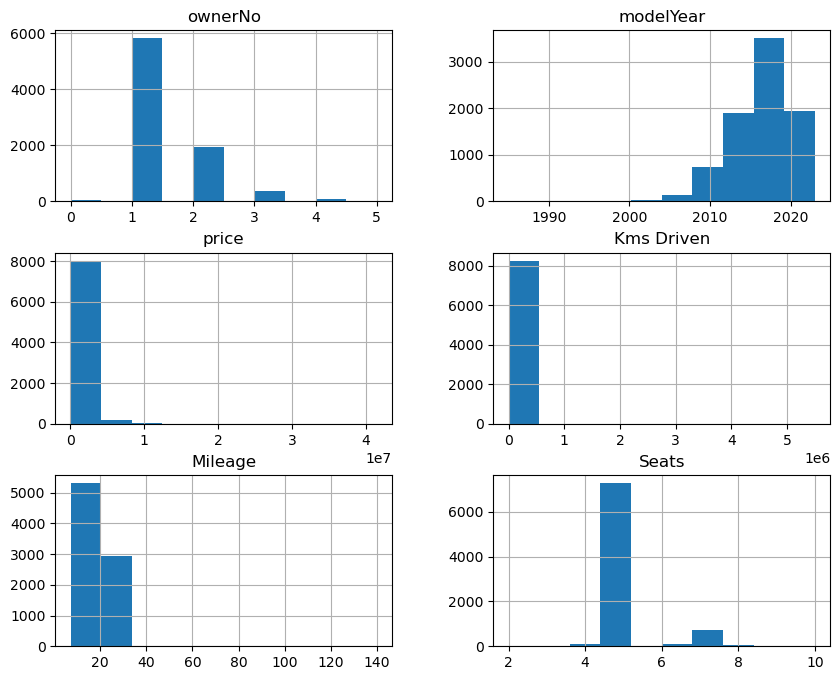

In [695]:
# histogram to visual the data distribution
df.hist(figsize=(10,8))
plt.show()

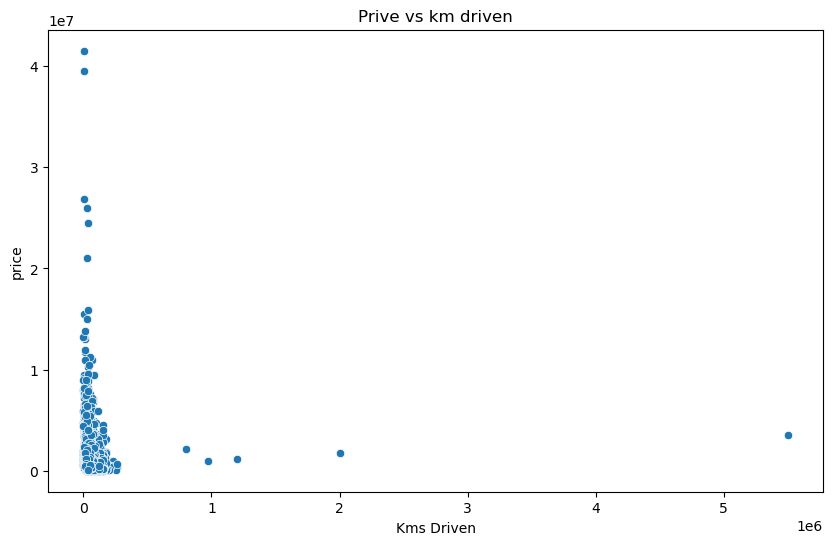

In [696]:
# scatterplot to visual the data distribution
plt.figure(figsize=(10, 6))
plt.title("Prive vs km driven")
sns.scatterplot(y='price', x='Kms Driven', data=df)
plt.xlabel("Kms Driven")
plt.ylabel("price")
plt.show()

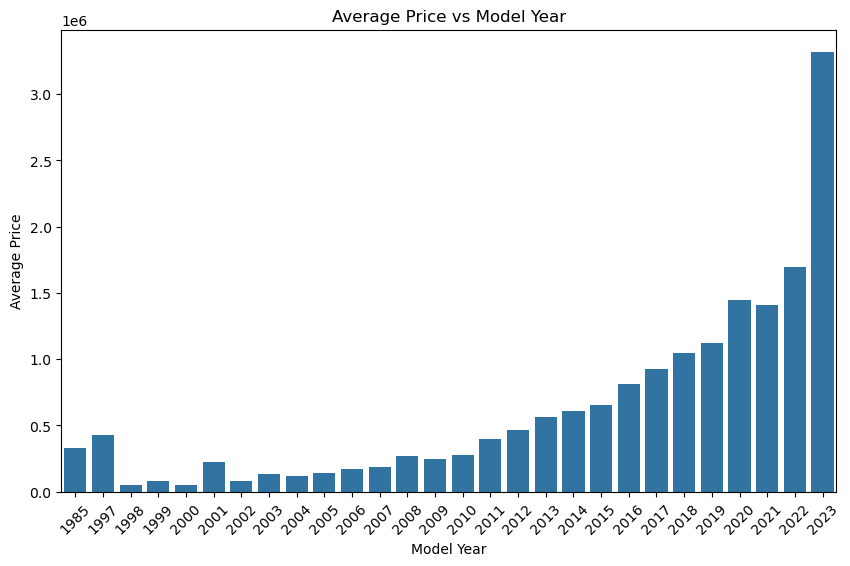

In [697]:
# Calculate the average price for each model year
avg_price_by_year = df.groupby('modelYear')['price'].mean().reset_index()

# Create a bar plot to visualize the average price by model year
plt.figure(figsize=(10, 6))
plt.title("Average Price vs Model Year")
sns.barplot(x='modelYear', y='price', data=avg_price_by_year)
plt.xlabel("Model Year")
plt.ylabel("Average Price")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

<Axes: xlabel='transmission', ylabel='price'>

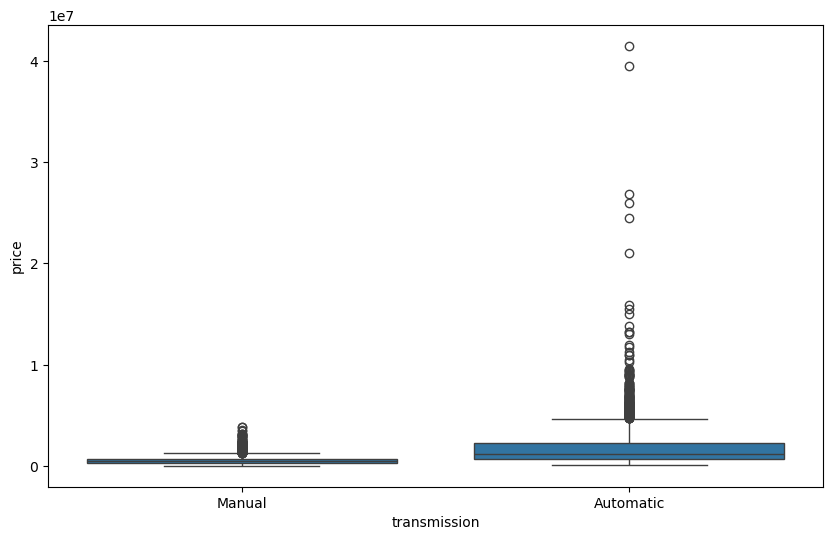

In [698]:
# transmission and price
plt.figure(figsize=(10,6))
sns.boxplot(x='transmission', y='price', data=df)

<Axes: xlabel='modelYear', ylabel='price'>

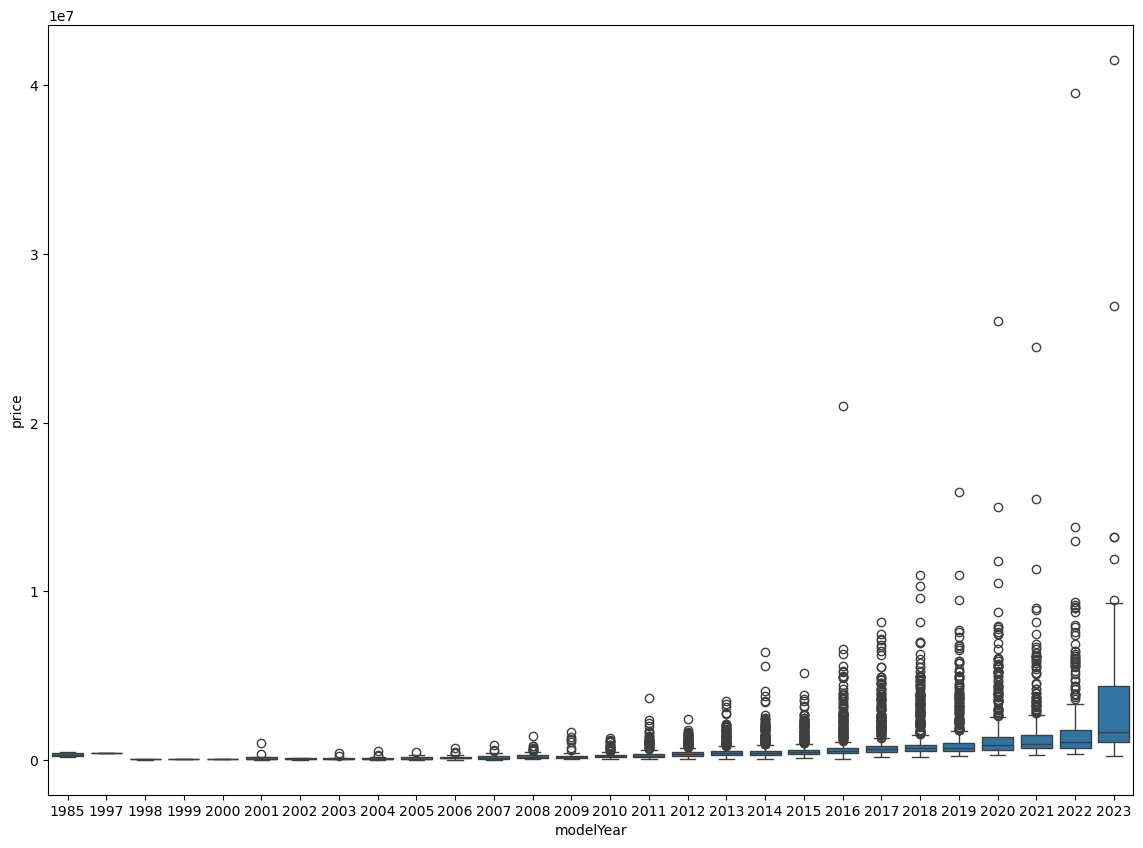

In [699]:
# modelYear and price
plt.figure(figsize=(14, 10))
sns.boxplot(x='modelYear', y='price', data=df)

<Axes: xlabel='body type', ylabel='price'>

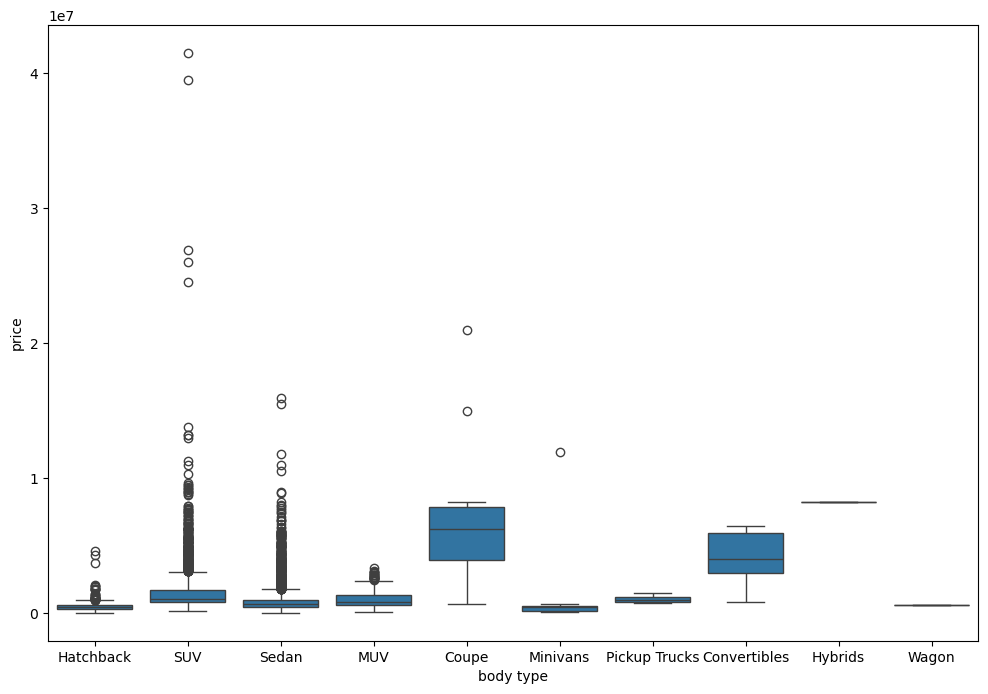

In [700]:
# body type	and price
plt.figure(figsize=(12,8))
sns.boxplot(x='body type', y='price', data=df)

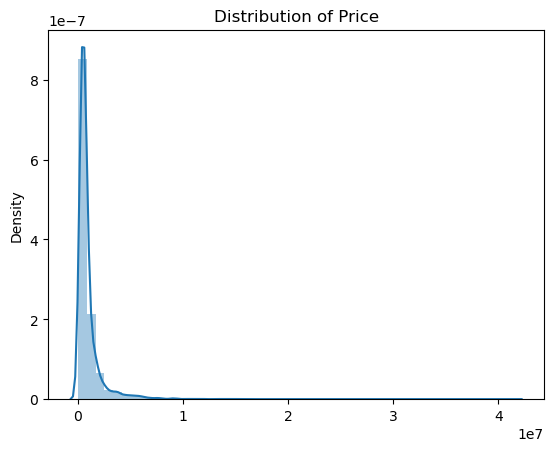

In [701]:
#distribution before outliers removing
sns.distplot(x=df["price"], kde=True)  # kde=True adds the KDE curve along with the histogram
plt.title("Distribution of Price")
plt.show()

<Axes: xlabel='body type', ylabel='price'>

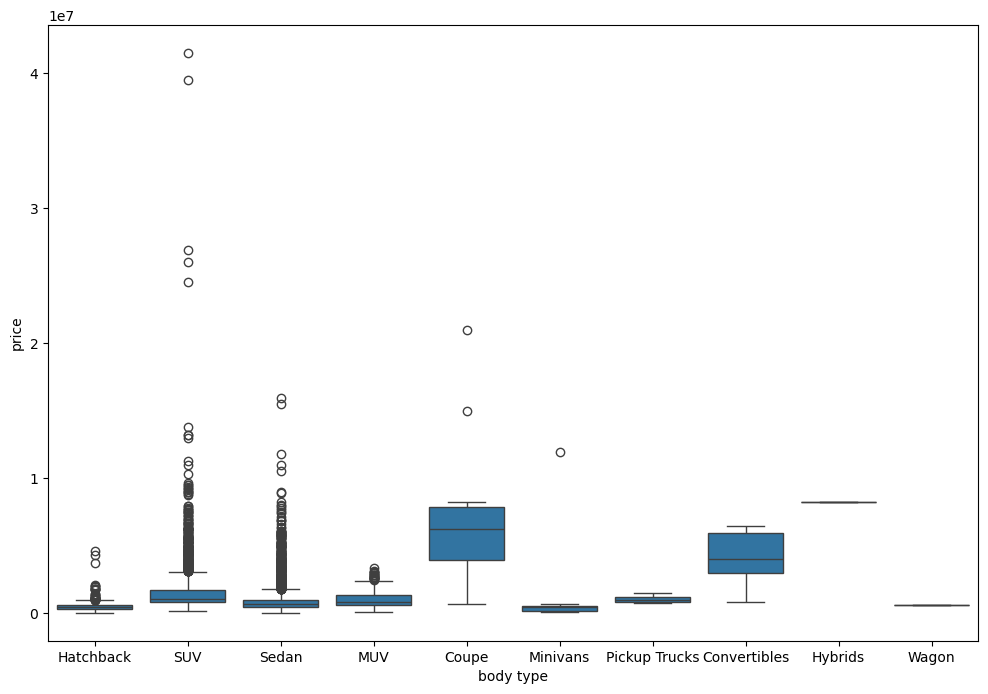

In [702]:
plt.figure(figsize=(12,8))
sns.boxplot(x='body type', y='price', data=df)

In [703]:
max_price_index = df["price"].idxmax()
max_price_row = df.loc[max_price_index]
print(max_price_row)

Fuel type                         Petrol
body type                            SUV
transmission                   Automatic
ownerNo                                1
Brand                      Mercedes-Benz
model             Mercedes-Benz AMG G 63
modelYear                           2023
price                         41500000.0
Insurance Type             Comprehensive
Kms Driven                          3500
Mileage                        19.245568
Seats                                  5
Color                              White
City                               Delhi
Name: 3376, dtype: object


In [704]:
df

,Fuel type,body type,transmission,ownerNo,Brand,model,modelYear,price,Insurance Type,Kms Driven,Mileage,Seats,Color,City
0,Petrol,Hatchback,Manual,3,Maruti,Maruti Celerio,2015,400000.0,Third Party insurance,120000,23.10,5,White,Bangalore
1,Petrol,SUV,Manual,2,Ford,Ford Ecosport,2018,811000.0,Comprehensive,32706,17.00,5,White,Bangalore
2,Petrol,Hatchback,Manual,1,Tata,Tata Tiago,2018,585000.0,Comprehensive,11949,23.84,5,Red,Bangalore
3,Petrol,Sedan,Manual,1,Hyundai,Hyundai Xcent,2014,462000.0,Comprehensive,17794,19.10,5,Others,Bangalore
4,Diesel,SUV,Manual,1,Maruti,Maruti SX4 S Cross,2015,790000.0,Third Party insurance,60000,23.65,5,Gray,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8354,Petrol,Hatchback,Manual,1,Maruti,Maruti Celerio,2022,510000.0,Third Party insurance,10000,25.24,5,Others,Kolkata
8355,Petrol,Hatchback,Manual,1,Maruti,Maruti Alto 800,2014,180000.0,Third Party insurance,120000,22.74,5,Others,Kolkata
8356,Petrol,Sedan,Automatic,3,Mercedes-Benz,Mercedes-Benz C-Class,2011,550000.0,Third Party insurance,50000,11.74,5,Others,Kolkata
8357,Petrol,Hatchback,Manual,1,Maruti,Maruti Ritz,2012,140000.0,Third Party insurance,40000,18.50,5,Others,Kolkata


# Scaling and Encoding    

In [794]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
file_path = "E:/UDHAYA/Cardeko_project/Cleaned_csv/Processed_dataset.csv"
df = pd.read_csv(file_path)

# Define the target column
target_col = 'price'  # Replace 'price' with the actual name of your target column

# Separate target and feature columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Ensure the target column is removed from the list of numerical columns to avoid scaling it
numerical_cols = [col for col in numerical_cols if col != target_col]

# Encoding categorical columns
label_encoders = {}
for col in categorical_cols:
    if df[col].nunique() == 2:  # Binary encoding
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    else:  # One-hot encoding for multi-class categorical columns
        df = pd.get_dummies(df, columns=[col], drop_first=True)

# Convert any True/False values to 0/1 for compatibility with ML models
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# Scaling numerical columns excluding the target column
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df

,transmission,ownerNo,modelYear,price,Kms Driven,Mileage,Seats,Fuel type_Diesel,Fuel type_Electric,Fuel type_Lpg,...,Color_g brown,Color_golden brown,Color_m grey,Color_magma gray,Color_urban titanim,City_Chennai,City_Delhi,City_Hyderabad,City_Jaipur,City_Kolkata
0,1,2.577392,-0.391413,400000.0,0.819543,1.001444,-0.305294,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.008900,0.379360,811000.0,-0.352937,-0.587173,-0.305294,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,-0.559592,0.379360,585000.0,-0.631733,1.194161,-0.305294,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,-0.559592,-0.648338,462000.0,-0.553226,-0.040272,-0.305294,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,-0.559592,-0.391413,790000.0,0.013659,1.144680,-0.305294,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8244,1,-0.559592,1.407057,510000.0,-0.657911,1.558762,-0.305294,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8245,1,-0.559592,-0.648338,180000.0,0.819543,0.907689,-0.305294,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8246,0,2.577392,-1.419111,550000.0,-0.120655,-1.957030,-0.305294,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8247,1,-0.559592,-1.162186,140000.0,-0.254969,-0.196530,-0.305294,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [796]:
path = "E:/UDHAYA/Cardeko_project/Cleaned_csv/ML_dataset.csv"
df.to_csv(path,index=False)